In [33]:
import pandas as pd

data = pd.read_excel("Boston Housing Dataset 1978.xlsx")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<Axes: >

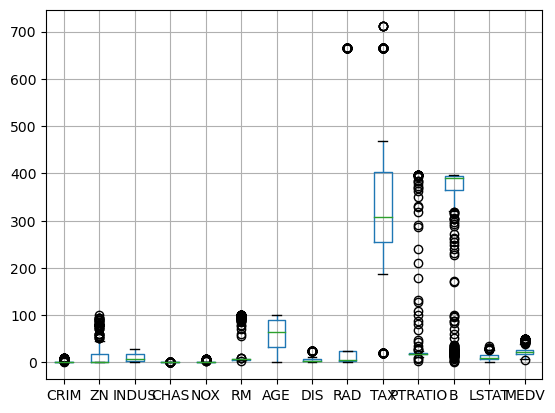

In [34]:
data.boxplot()

In [35]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [44]:
columnas=["INDUS","AGE","TAX","RAD","MEDV"]
df=data[columnas]
age = df["AGE"]
age=age/max(age)

def scaler(x):
    x=x-min(x)
    x=x/max(x)
    return x

df["AGE"]=scaler(df["AGE"])
df["INDUS"]=scaler(df["INDUS"])
df["TAX"]=scaler(df["TAX"])
df["RAD"]=scaler(df["RAD"])



C:\Users\chris\AppData\Local\Temp\ipykernel_18232\1442171298.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AGE"]=scaler(df["AGE"])
C:\Users\chris\AppData\Local\Temp\ipykernel_18232\1442171298.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["INDUS"]=scaler(df["INDUS"])
C:\Users\chris\AppData\Local\Temp\ipykernel_18232\1442171298.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [49]:
df=df.dropna()
def funcion_de_costo(beta,X, y):
    r, c=X.shape
    beta=np.reshape(beta,[c,1])
    ypred=X@beta
    error = ypred-y
    return  (error.T @ error )[0,0]

import numpy as np
m=len(df["MEDV"])
ones=np.ones([m,1])
indus=np.reshape(df["INDUS"],[m,1])
age=np.reshape(df["AGE"],[m,1])
tax=np.reshape(df["TAX"],[m,1])
rad=np.reshape(df["RAD"],[m,1])
X=np.hstack( (ones, indus, age, tax, rad) )
y=np.reshape(df["MEDV"],[m,1])


In [50]:
import scipy.optimize as opt
beta=[1,1,1,1,1]
opt.minimize(funcion_de_costo, beta, args=(X,y))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 28036.267557740983
        x: [ 3.457e+01 -8.578e+00 -2.745e+00 -1.552e+01  2.122e+02]
      nit: 17
      jac: [ 0.000e+00 -4.883e-04 -2.441e-04 -4.883e-04  0.000e+00]
 hess_inv: [[ 4.973e-03  7.633e-03 ... -4.800e-03  2.200e-02]
            [ 7.633e-03  3.754e-02 ... -2.376e-02  9.215e-02]
            ...
            [-4.800e-03 -2.376e-02 ...  3.513e-02 -4.161e-02]
            [ 2.200e-02  9.215e-02 ... -4.161e-02  2.439e-01]]
     nfev: 192
     njev: 32

# MOTOR TREND CAR ROAD TESTS

<Axes: >

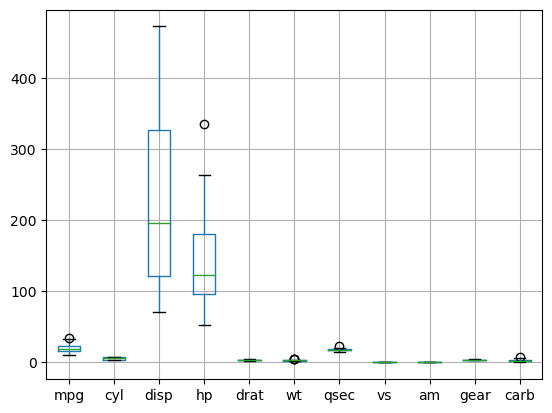

In [58]:
import pandas as pd

data = pd.read_excel("Motor Trend Car Road Tests.xlsx")
data.boxplot()
df=

In [57]:
df

,INDUS,AGE,TAX,RAD,MEDV
0,0.083273,0.647998,0.399247,0.000000,24.0
1,0.254867,0.786573,0.321077,0.001504,21.6
2,0.254867,0.606526,0.321077,0.001504,34.7
3,0.078587,0.451767,0.292125,0.003008,33.4
4,0.078587,0.536733,0.292125,0.003008,36.2
...,...,...,...,...,...
501,0.430065,0.687446,0.365953,0.000000,22.4
502,0.430065,0.764320,0.365953,0.000000,20.6
503,0.430065,0.908965,0.365953,0.000000,23.9
504,0.430065,0.891769,0.365953,0.000000,22.0


In [52]:
columnas=["disp","hp","mpg","cyl","drat","vs","am","gear"]
df=data[columnas]

def scaler(x):
    x=x-min(x)
    x=x/max(x)
    return x

df["disp"]=scaler(df["disp"])
df["hp"]=scaler(df["hp"])
df["mpg"]=scaler(df["mpg"])
df["cyl"]=scaler(df["cyl"])
df["drat"]=scaler(df["drat"])
df["vs"]=scaler(df["vs"])
df["am"]=scaler(df["am"])
df["gear"]=scaler(df["gear"])

df.describe

KeyError: "None of [Index(['disp', 'hp', 'mpg', 'cyl', 'drat', 'vs', 'am', 'gear'], dtype='object')] are in the [columns]"

In [31]:
def funcion_de_costo(beta,X, y):
    r, c=X.shape
    beta=np.reshape(beta,[c,1])
    ypred=X@beta
    error = ypred-y
    return  (error.T @ error )[0,0]

import numpy as np
m=len(df["mpg"])
ones=np.ones([m,1])
disp=np.reshape(df["disp"],[m,1])
hp=np.reshape(df["hp"],[m,1])
cyl=np.reshape(df["cyl"],[m,1])
drat=np.reshape(df["drat"],[m,1])
vs=np.reshape(df["vs"],[m,1])
am=np.reshape(df["am"],[m,1])
gear=np.reshape(df["gear"],[m,1])
X=np.hstack( (ones, disp, hp, cyl, drat, vs, am, gear) )
y=np.reshape(df["mpg"],[m,1])



<bound method NDFrame.describe of         disp        hp       mpg  cyl      drat   vs   am  gear
0   0.221751  0.204947  0.451064  0.5  0.525346  0.0  1.0   0.5
1   0.221751  0.204947  0.451064  0.5  0.525346  0.0  1.0   0.5
2   0.092043  0.144876  0.527660  0.0  0.502304  1.0  1.0   0.5
3   0.466201  0.204947  0.468085  0.5  0.147465  1.0  0.0   0.0
4   0.720629  0.434629  0.353191  1.0  0.179724  0.0  0.0   0.0
5   0.383886  0.187279  0.327660  0.5  0.000000  1.0  0.0   0.0
6   0.720629  0.681979  0.165957  1.0  0.207373  0.0  0.0   0.0
7   0.188576  0.035336  0.595745  0.0  0.428571  1.0  0.0   0.5
8   0.173859  0.151943  0.527660  0.0  0.534562  1.0  0.0   0.5
9   0.240708  0.250883  0.374468  0.5  0.534562  1.0  0.0   0.5
10  0.240708  0.250883  0.314894  0.5  0.534562  1.0  0.0   0.5
11  0.510601  0.452297  0.255319  1.0  0.142857  0.0  0.0   0.0
12  0.510601  0.452297  0.293617  1.0  0.142857  0.0  0.0   0.0
13  0.510601  0.452297  0.204255  1.0  0.142857  0.0  0.0   0.0
14  1.

In [51]:
import scipy.optimize as opt
beta=[1,1,1,1,1,1,1,1,1,1]
opt.minimize(funcion_de_costo, beta, args=(X,y))

ValueError: cannot reshape array of size 10 into shape (5,1)